In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sale/BlackFriday (1).csv


In [5]:
link = "/kaggle/input/black-friday-sale/BlackFriday (1).csv"

In [6]:
df = pd.read_csv(link);
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


# here i load my dataset

In [7]:
df.shape

(537577, 12)

# Check shape of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Info of data type and null values

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

# Counted null 

In [10]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
425679,1005539,P00156442,F,26-35,20,B,1,1,8,NaN,NaN,7940
119389,1000424,P00048442,M,26-35,17,A,3,0,5,14.0,NaN,8621
254525,1003305,P00136842,M,55+,20,C,0,0,1,8.0,16.0,18992
345769,1005244,P00277642,M,18-25,4,C,1,0,2,3.0,10.0,9736
115889,1005888,P00005042,M,26-35,20,B,1,0,6,16.0,NaN,20274


<Axes: xlabel='Product_Category_2'>

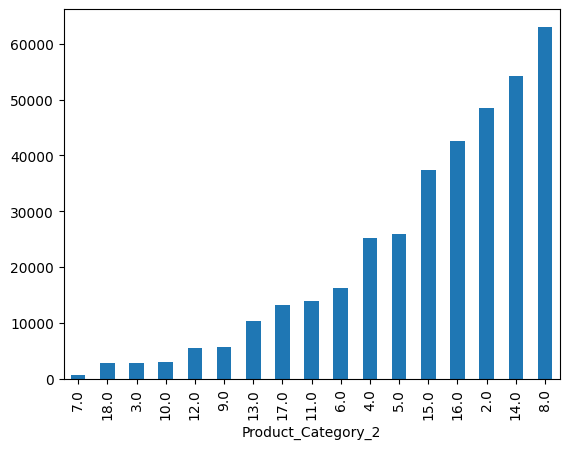

In [11]:
df.groupby('Product_Category_2').size().sort_values().plot(kind='bar')

In [12]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

In [13]:

def fun(value):
    if pd.isna(value):
        return 1
    return value
# Applying the function to 'Product_Category_2' column
df['Product_Category_2'] = df['Product_Category_2'].apply(fun)


# Here  i done null value handling in product category 2 and deleted category 3 as it was not having information to handle null value

In [14]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,1.0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1.0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,1.0,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,1.0,NaN,7172


In [15]:
del df['Product_Category_3']
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,1.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,1.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,1.0,7172


In [16]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
24566,1003800,P00245642,M,18-25,1,B,1,1,5,11.0,5150


In [17]:
for i in df.columns:
    print(i , ":", df[i].unique().size)

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 18
Purchase : 17959


# Indentified Categorical & Numerical data

<Axes: xlabel='Gender'>

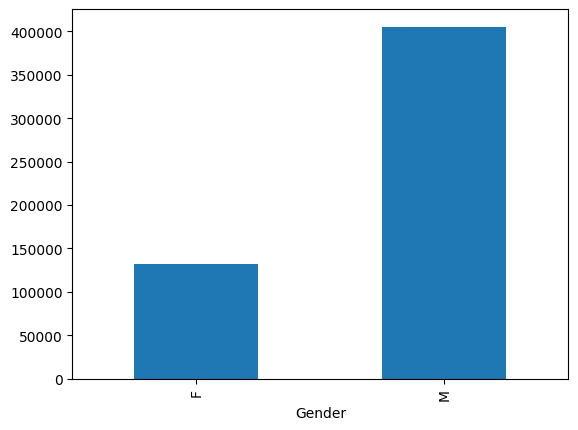

In [18]:
df.groupby('Gender').size().plot(kind = 'bar')

<Axes: >

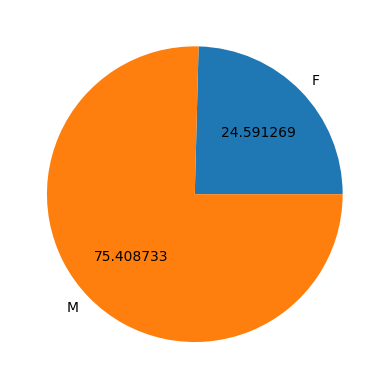

In [19]:
df.groupby('Gender').size().plot(kind = 'pie',autopct="%1f")

<Axes: ylabel='Purchase'>

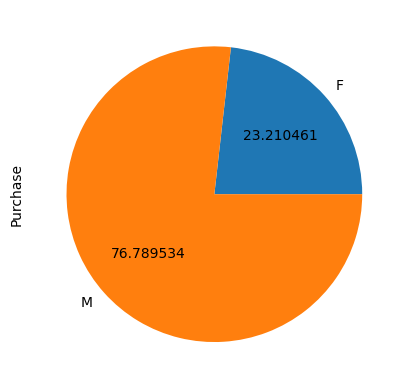

In [20]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',autopct='%1f')

<Axes: ylabel='Purchase'>

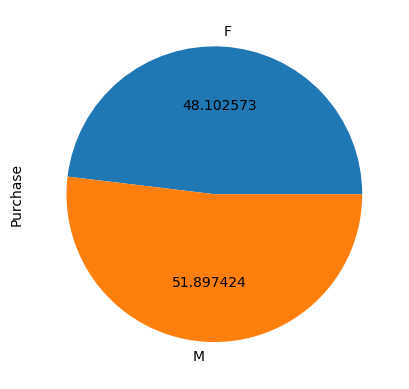

In [21]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie',autopct='%1f')

#  *  Man are more in population
#  *  Man are spending more 
#  *  Man are stightly purchasing expensive single transaction

In [22]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
229361,1005367,P00017242,M,18-25,4,A,1,0,11,1.0,1649


<Axes: xlabel='Age'>

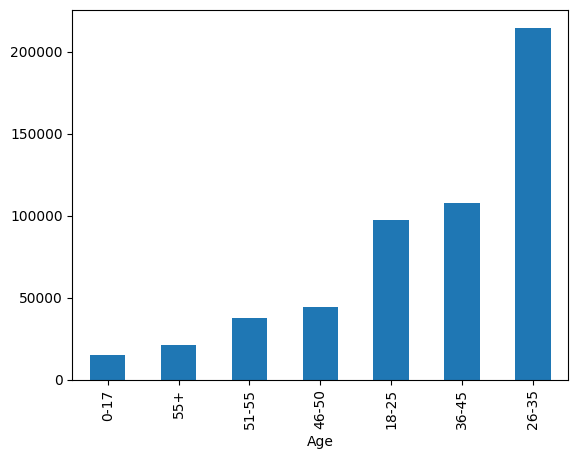

In [23]:
df.groupby('Age').size().sort_values().plot(kind='bar')

# Above graph shows the most purchase is done by 26-35 age category population

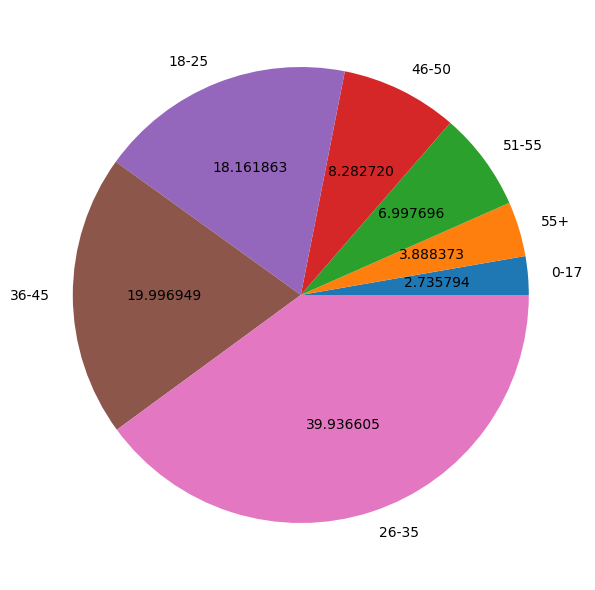

In [24]:
plot.figure(figsize = (10,6))
df.groupby('Age').size().sort_values().plot(kind='pie',autopct= '%1f')
plot.tight_layout()
plot.show()

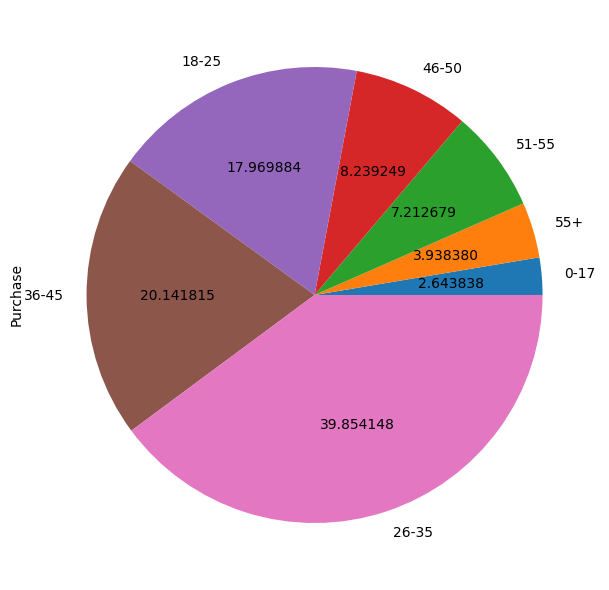

In [25]:
plot.figure(figsize = (10,6))
df.groupby('Age')['Purchase'].sum().sort_values().plot(kind='pie',autopct='%1f')
plot.tight_layout()
plot.show()


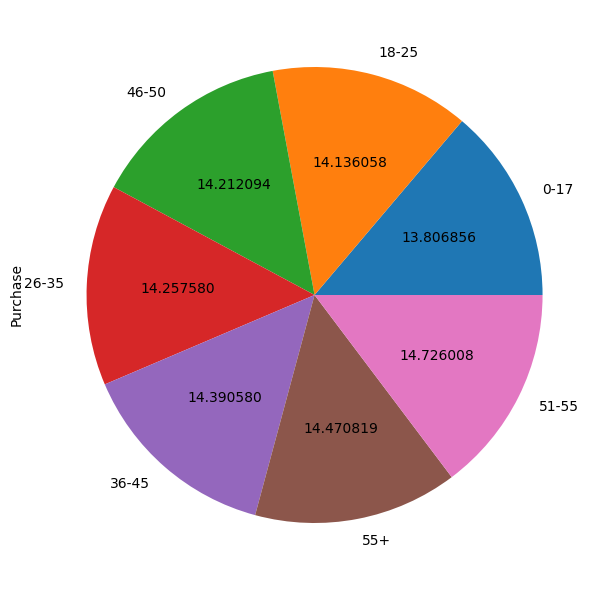

In [27]:
plot.figure(figsize = (10,6))
df.groupby('Age')['Purchase'].mean().sort_values().plot(kind='pie',autopct='%1f')
plot.tight_layout()
plot.show()

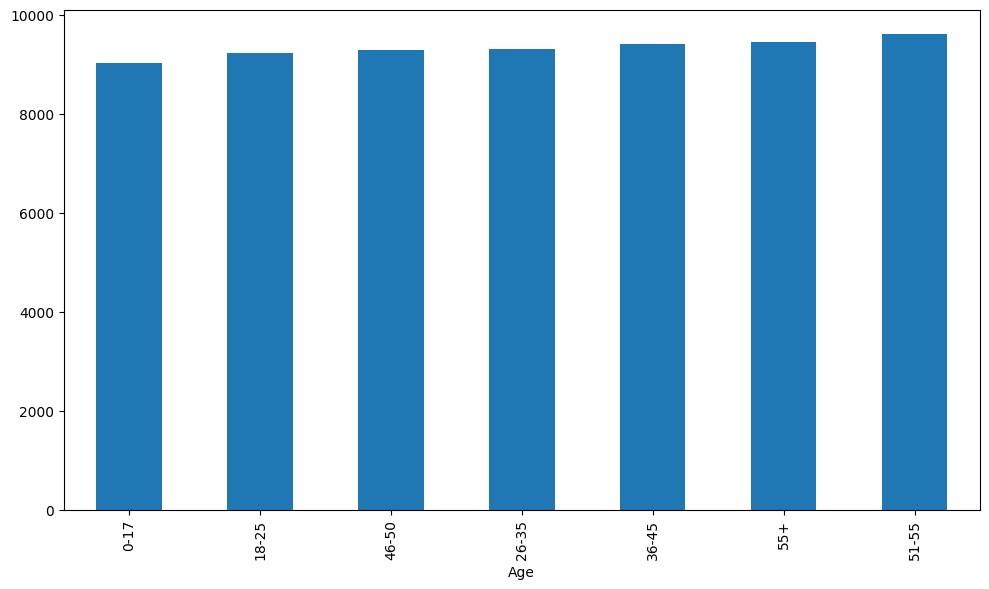

In [29]:
plot.figure(figsize = (10,6))
df.groupby('Age')['Purchase'].mean().sort_values().plot(kind='bar')
plot.tight_layout()
plot.show()

# Here we can see that 26-35 age people are doing  more purchase where as 51-55 age group is purchasing expensive products

In [30]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
189855,1005329,P00346842,F,26-35,5,B,1,0,11,1.0,3023


<Axes: xlabel='Age', ylabel='count'>

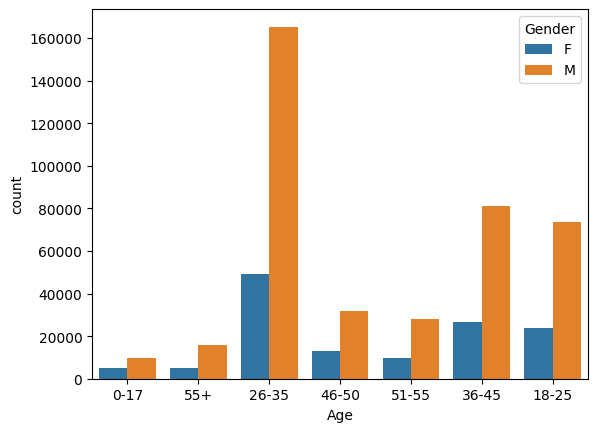

In [33]:
sns.countplot(data = df,x='Age',hue="Gender")

In [41]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# g = sns.FacetGrid(df, col='Gender', row='Marital_Status')
# g.map(sns.histplot, 'Age')
# plt.show()
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
427828,1005871,P00157142,F,26-35,4,B,1,0,11,16.0,2967


<Axes: xlabel='Age', ylabel='count'>

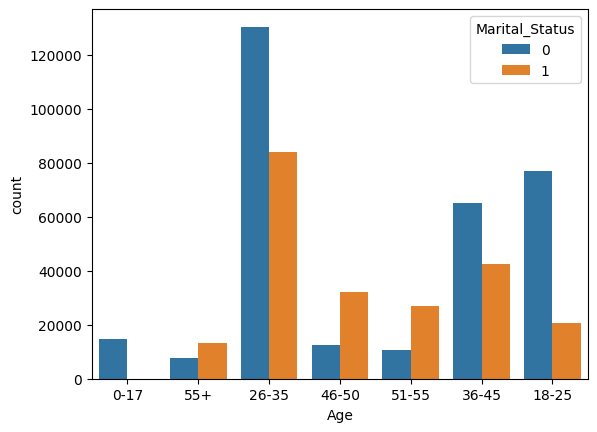

In [42]:
sns.countplot(data = df,x='Age',hue="Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

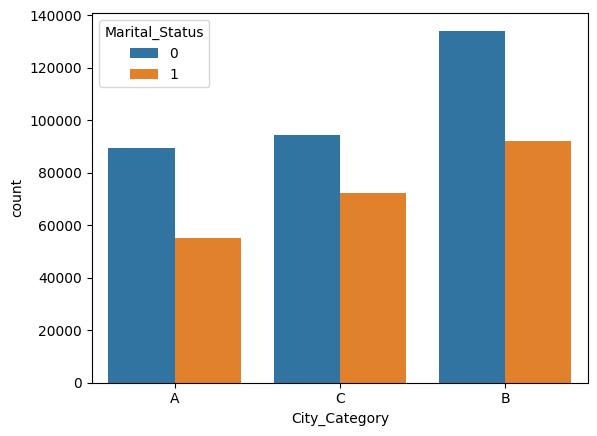

In [43]:
sns.countplot(data = df,x='City_Category',hue="Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

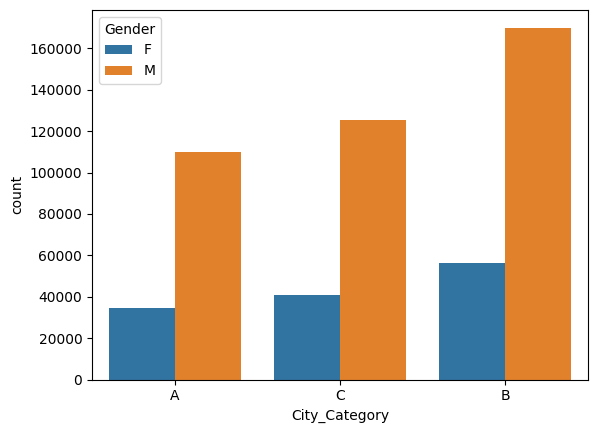

In [98]:
sns.countplot(data = df,x='City_Category',hue="Gender")

<Axes: xlabel='Occupation', ylabel='count'>

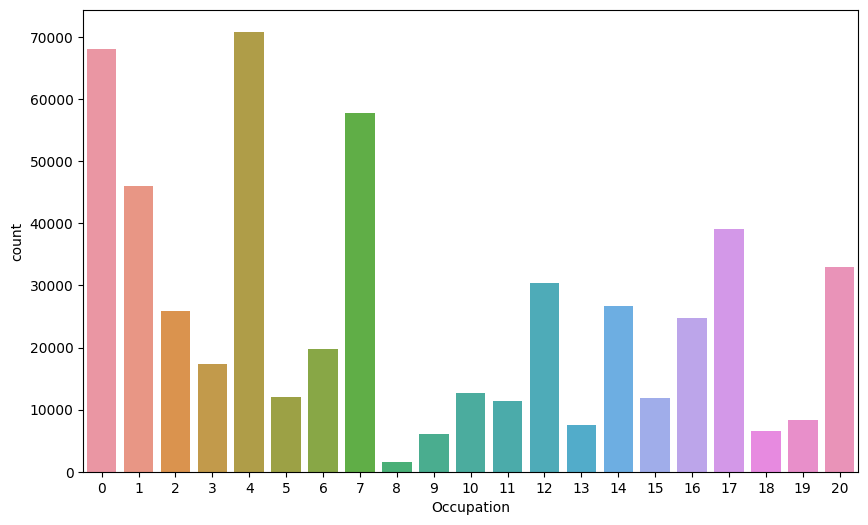

In [54]:
plot.figure(figsize=(10,6))
sns.countplot(data = df,x='Occupation')

<Axes: xlabel='Occupation'>

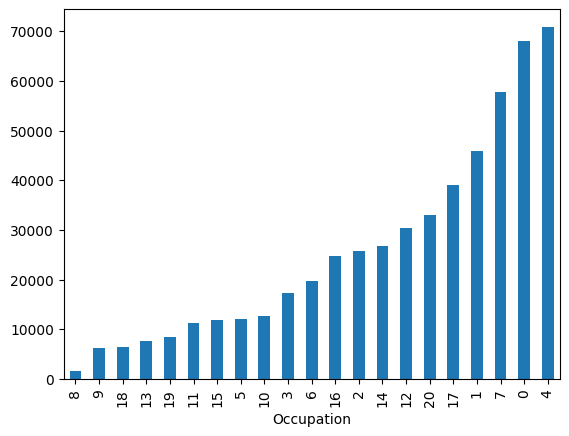

In [59]:
df.groupby('Occupation').size().sort_values().plot(kind ='bar')

<Axes: xlabel='Occupation'>

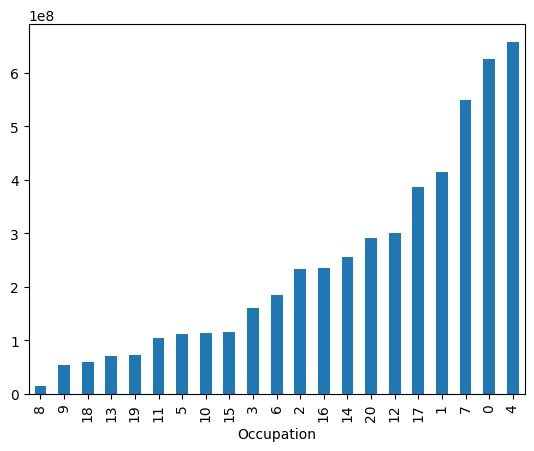

In [61]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind ='bar')

<Axes: xlabel='Occupation'>

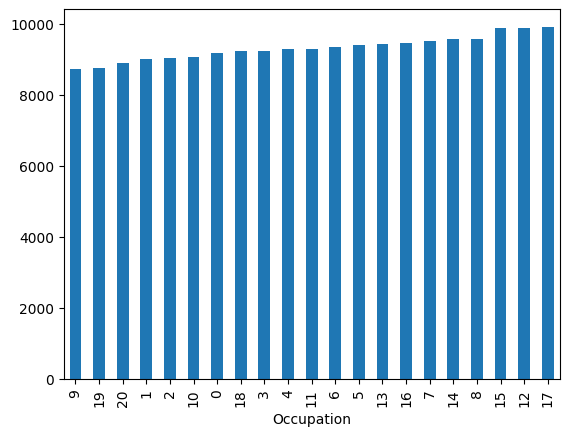

In [68]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind ='bar')

# 4 occupation population is purchasing more and spending more but they purchasing cheaper product than 15,17,12, category

<Axes: xlabel='Occupation', ylabel='count'>

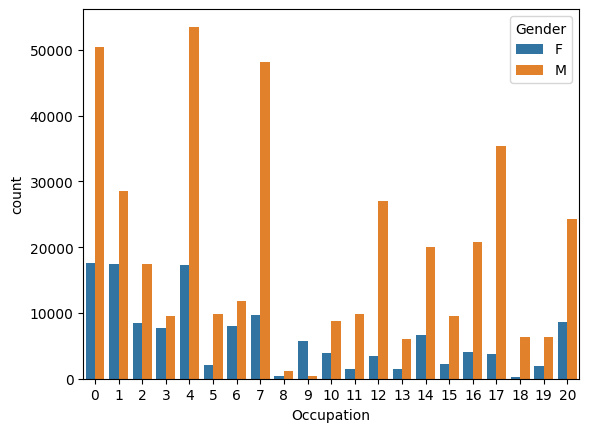

In [70]:
sns.countplot(data = df,x = 'Occupation',hue = 'Gender')

# In each occupation male are spending more and we can see 4th occupation male and 0th 1st and 4th female are spending among there respective category.

<Axes: xlabel='Occupation', ylabel='count'>

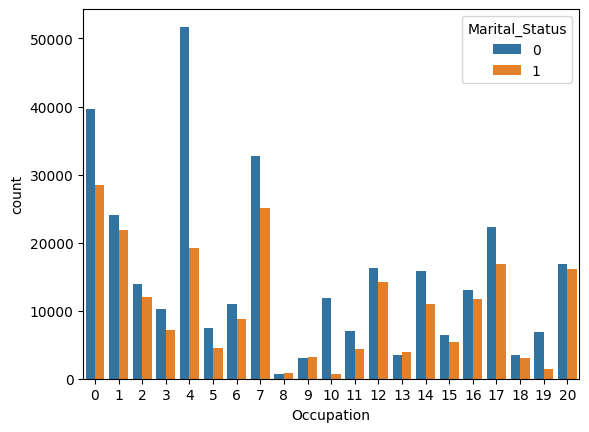

In [73]:
sns.countplot(data = df,x = 'Occupation',hue = 'Marital_Status')

# 4,10,0 most %pepole are unmarried wherea as in 8,9,20 more % of people are married 

In [74]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
445457,1002592,P00274442,M,51-55,7,B,1,1,1,18.0,11810


<Axes: xlabel='Occupation'>

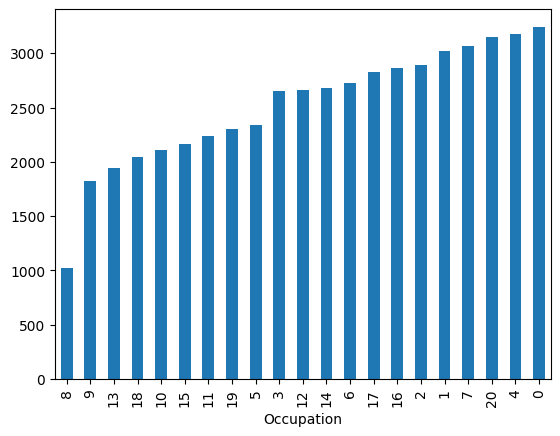

In [88]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

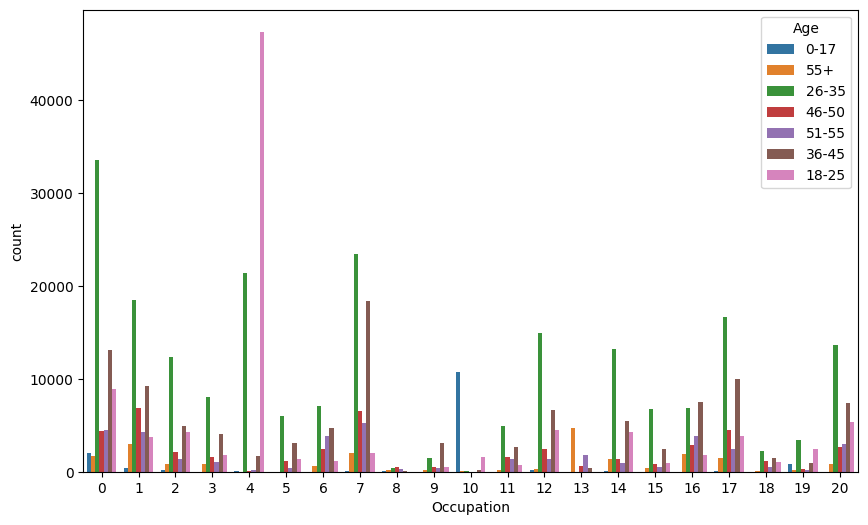

In [85]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x = 'Occupation', hue = 'Age')

In [86]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
324243,1001901,P00001042,M,51-55,7,C,3,1,1,2.0,12071


<Axes: xlabel='City_Category'>

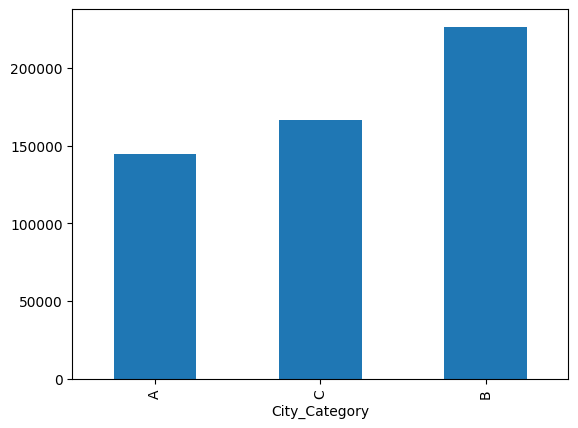

In [89]:
df.groupby('City_Category').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='City_Category'>

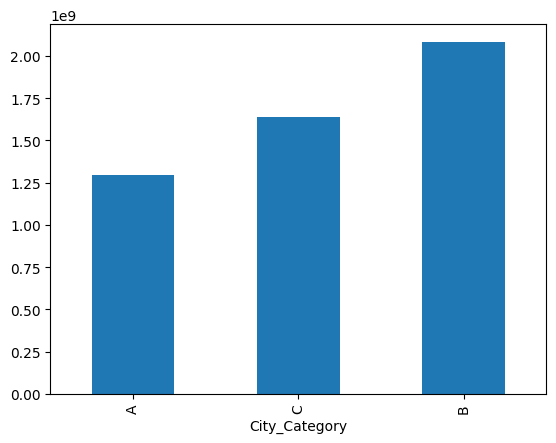

In [90]:
df.groupby('City_Category').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='City_Category'>

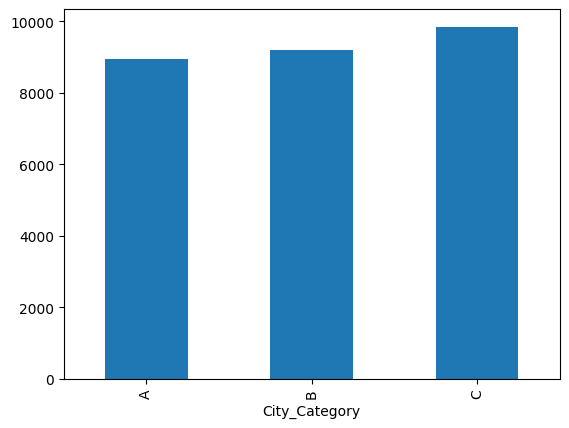

In [92]:
df.groupby('City_Category')['Purchase'].mean().sort_values().plot(kind = 'bar')

1. city b is purchasing more but less expensive /purshing power than c
2. city c population have more purchasing power
3. city a population purchasing less and having least purchasing power

In [93]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
465733,1005744,P00265142,F,26-35,4,A,2,0,3,12.0,10636


<Axes: xlabel='City_Category', ylabel='count'>

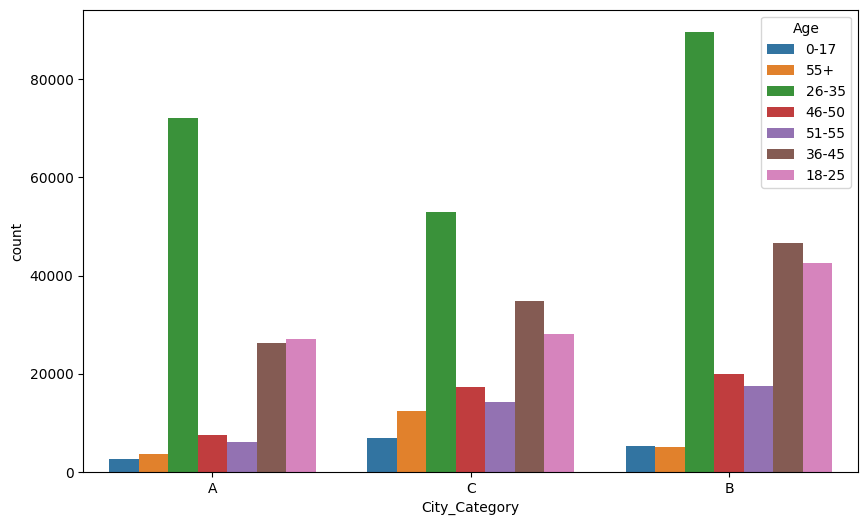

In [97]:
plot.figure(figsize = (10,6))
sns.countplot(data =df ,x = 'City_Category',hue = 'Age')

<Axes: xlabel='City_Category', ylabel='count'>

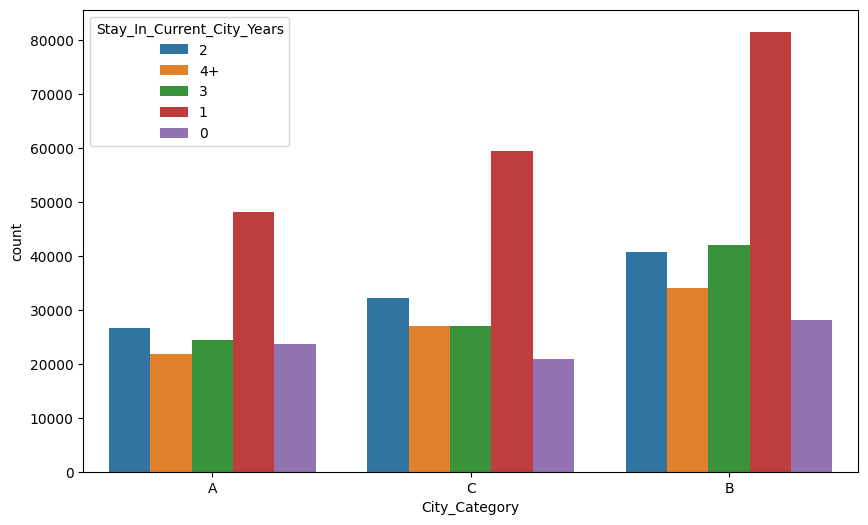

In [100]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x='City_Category',hue="Stay_In_Current_City_Years")

<Axes: xlabel='Stay_In_Current_City_Years'>

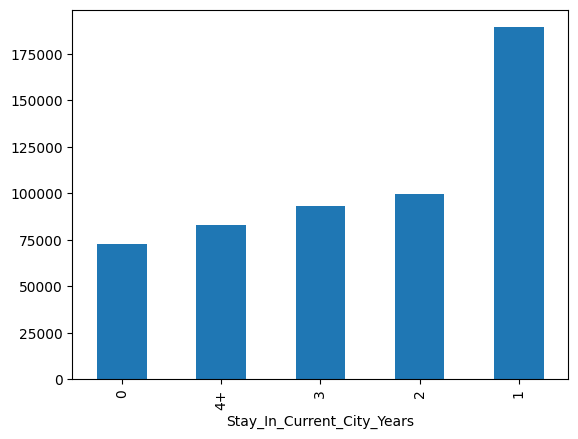

In [101]:
df.groupby('Stay_In_Current_City_Years').size().sort_values().plot(kind='bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

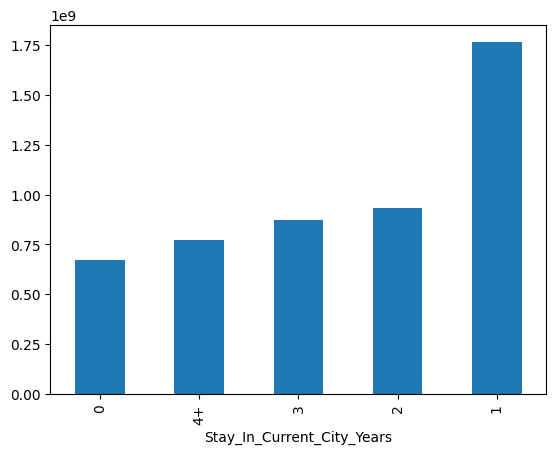

In [102]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

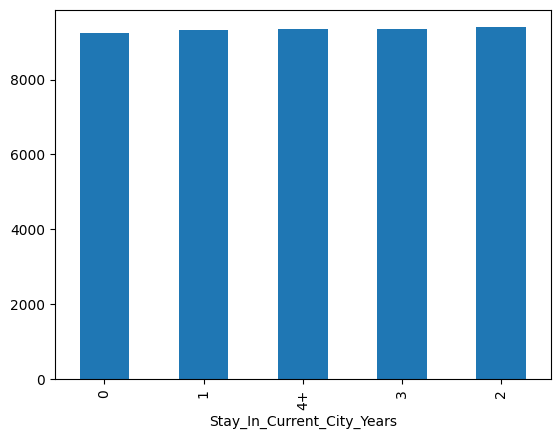

In [105]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

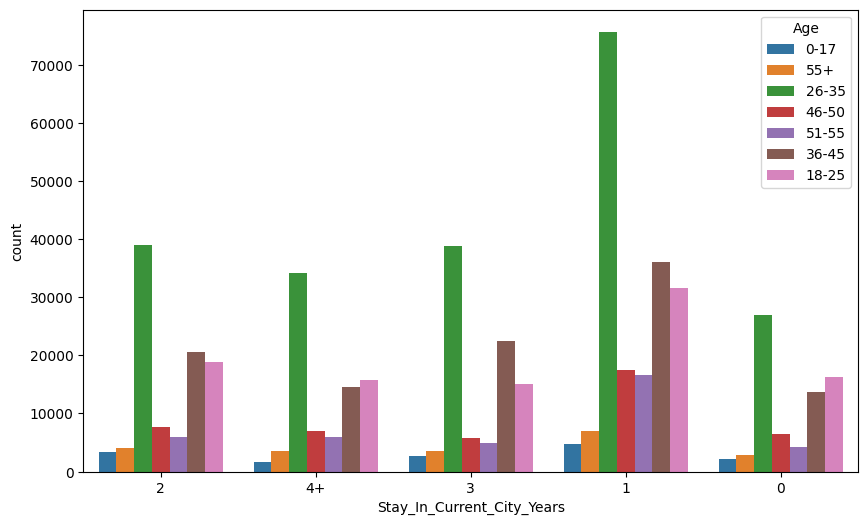

In [106]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x="Stay_In_Current_City_Years",hue = 'Age')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

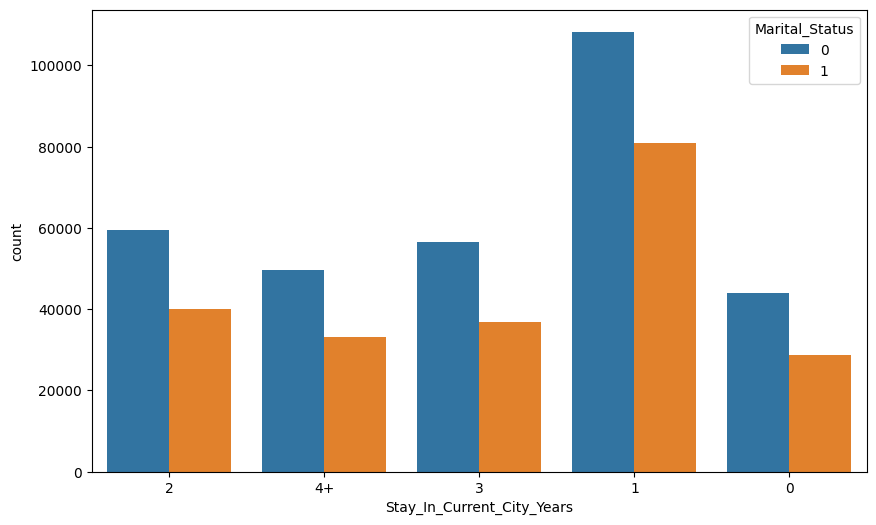

In [107]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x="Stay_In_Current_City_Years",hue = 'Marital_Status')

<Axes: xlabel='Stay_In_Current_City_Years'>

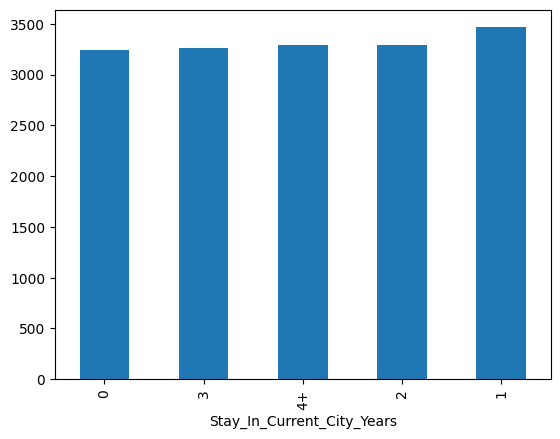

In [108]:
df.groupby('Stay_In_Current_City_Years').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

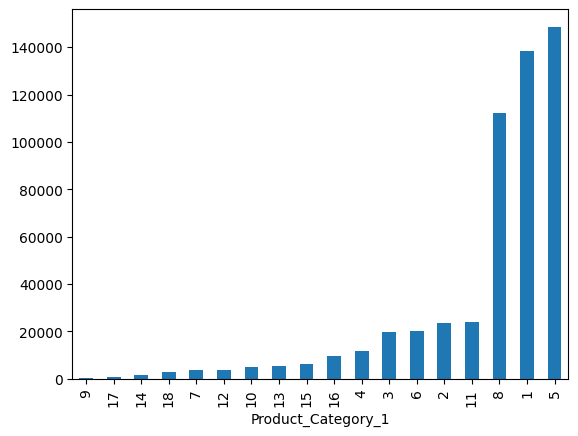

In [110]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

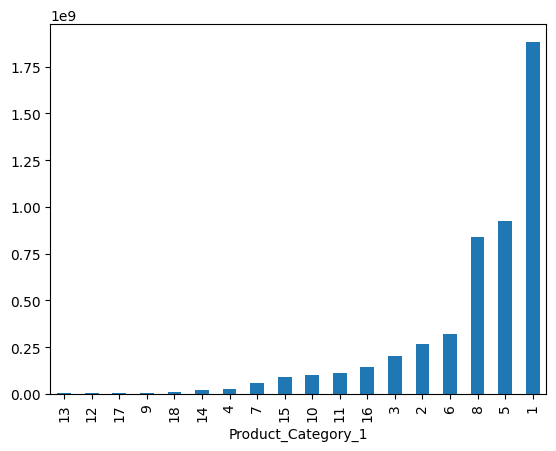

In [111]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

# here we can see that 1 is approx 2 time more expensive than 5 and as we in further analysis see it using mean 

<Axes: xlabel='Product_Category_1'>

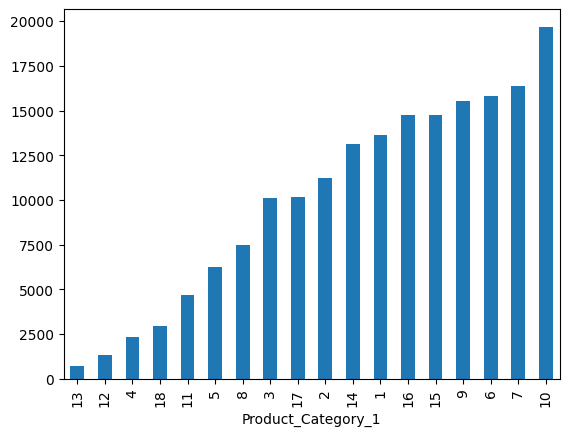

In [114]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

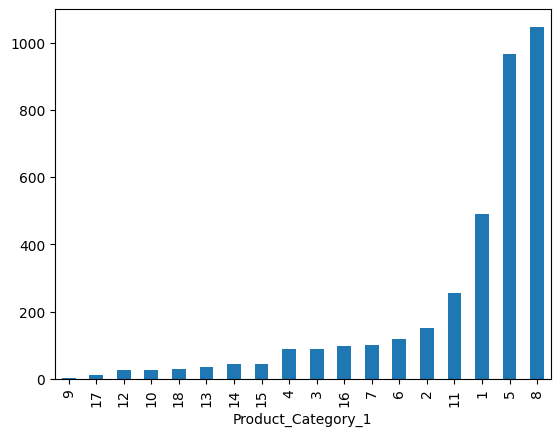

In [116]:
df.groupby('Product_Category_1').nunique()['Product_ID'].sort_values().plot(kind='bar')

1. product c8 have many variety and sales of 8 are in top 3 and we can se it in not much expensive 
2. product c10 have less variety and its overall sale is less but it is most expensive asit can be products of jewellary 

<Axes: xlabel='Product_Category_1', ylabel='count'>

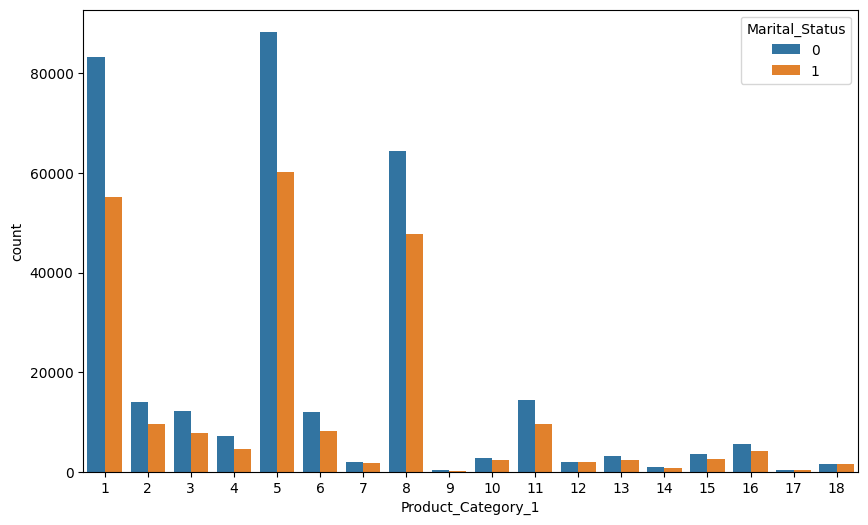

In [117]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x='Product_Category_1',hue="Marital_Status")

<Axes: xlabel='Product_Category_1', ylabel='count'>

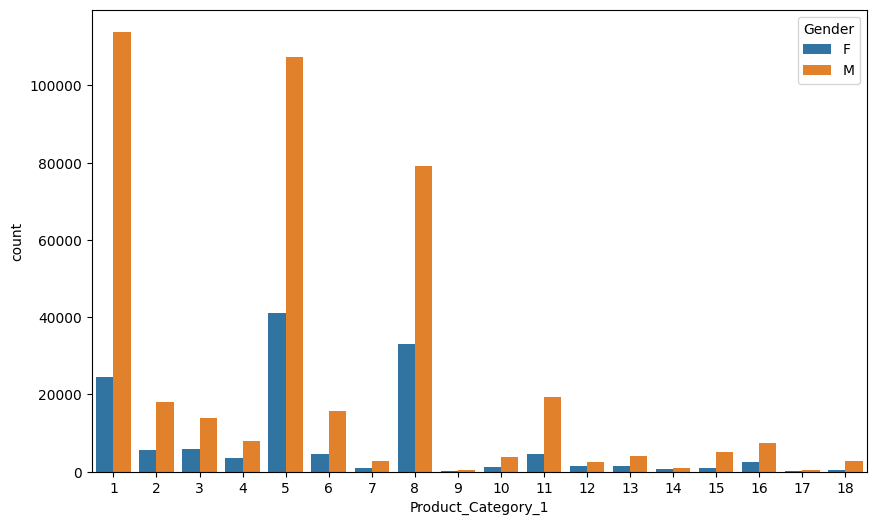

In [118]:
plot.figure(figsize = (10,6))
sns.countplot(data = df,x='Product_Category_1',hue="Gender")

<Axes: xlabel='Product_ID'>

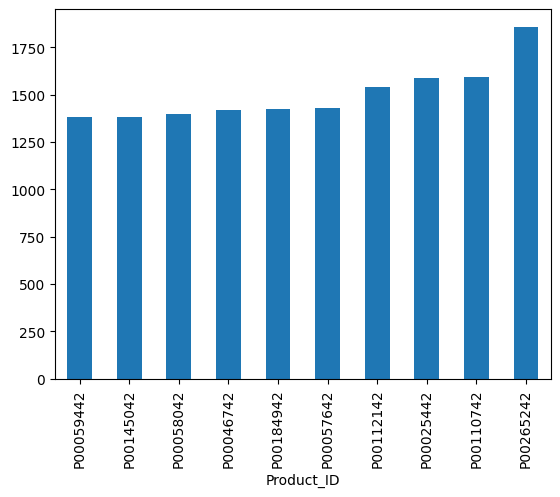

In [119]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

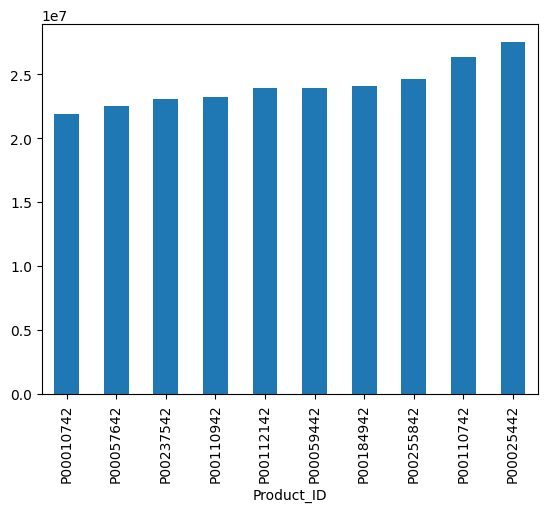

In [120]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

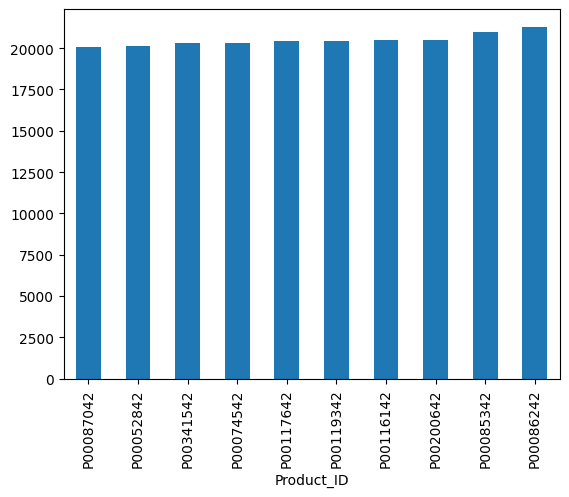

In [123]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

In [127]:
lst =[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+str(df['Marital_Status'][i]))


In [135]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,maritial_gender
10078,1001546,P00118442,M,26-35,4,A,4+,1,1,2.0,19355,M1


<Axes: xlabel='maritial_gender', ylabel='count'>

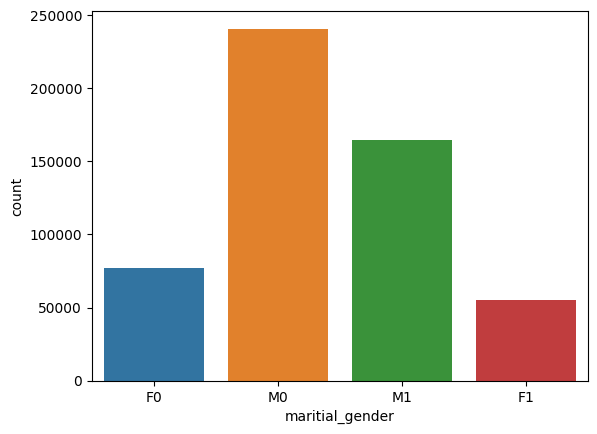

In [136]:
sns.countplot(data =df,x = 'maritial_gender')

<Axes: >

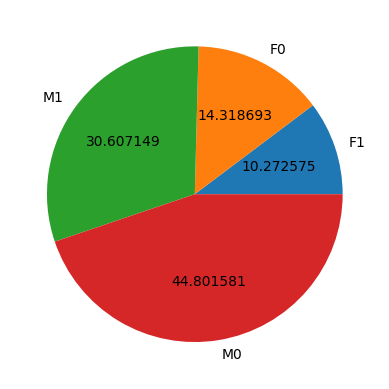

In [138]:
df.groupby('maritial_gender').size().sort_values().plot(kind='pie',autopct="%1f")

<Axes: ylabel='Purchase'>

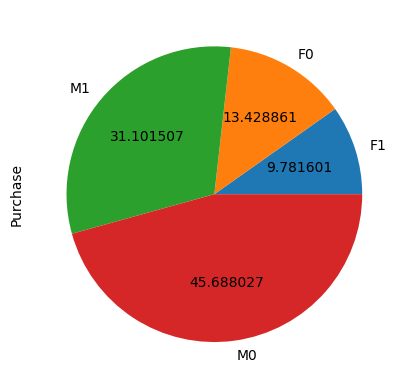

In [139]:
df.groupby('maritial_gender').sum()['Purchase'].sort_values().plot(kind='pie',autopct="%1f")

<Axes: ylabel='Purchase'>

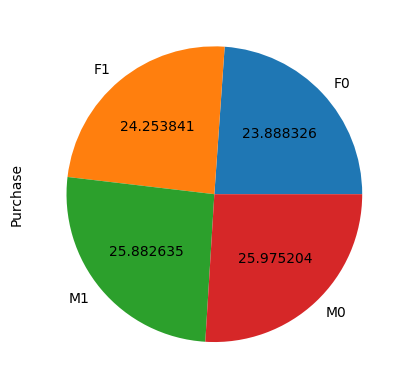

In [140]:
df.groupby('maritial_gender')['Purchase'].mean().sort_values().plot(kind='pie',autopct="%1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

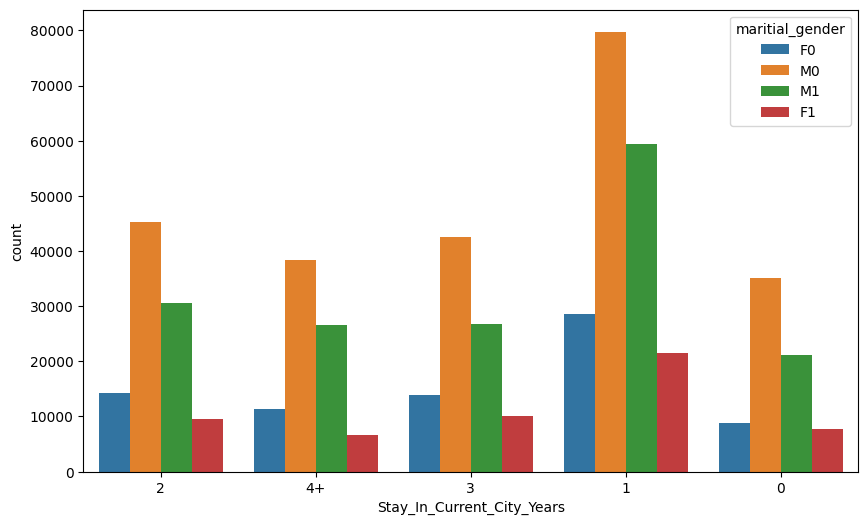

In [144]:
plot.figure(figsize=(10,6))
sns.countplot(data =df,x='Stay_In_Current_City_Years',hue='maritial_gender')

<Axes: xlabel='City_Category', ylabel='count'>

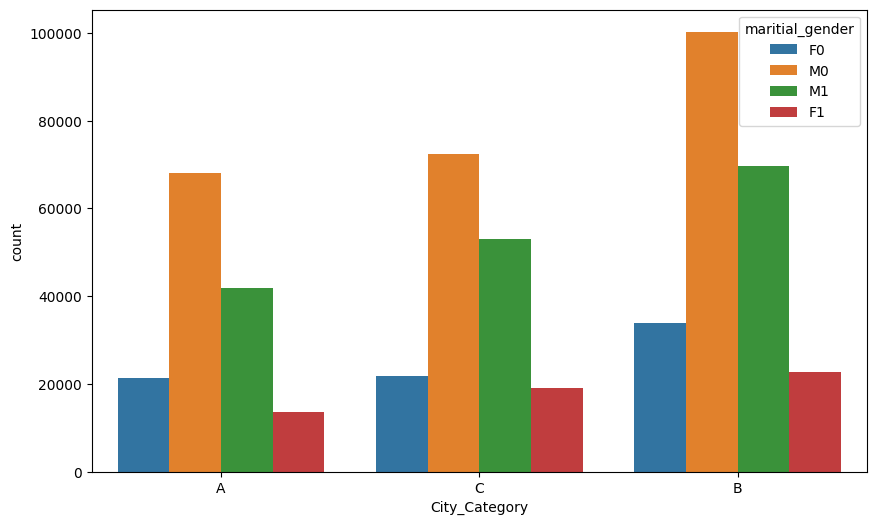

In [145]:
plot.figure(figsize=(10,6))
sns.countplot(data =df,x='City_Category',hue='maritial_gender')

In [137]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,maritial_gender
334012,1003479,P00192042,M,18-25,4,C,2,0,5,9.0,5198,M0
